In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [5]:
# Step 1
n_samples = 200           # (200) - Number of points we are going to model.
cluster_1_centre = [2,2]  # [2,2] - Centre of the first cluster
cluster_2_centre = [6,6]  # [6,6] - Centre of cluster 2
spread = 1                # (1) - How spread-out the two clusters (blobs) are

data, labels = make_blobs(n_samples=n_samples,
                          centers=(cluster_1_centre, cluster_2_centre),
                          cluster_std = spread, 
                          random_state=0)

In [6]:
data[0:5]

array([[4.26975462, 0.54563433],
       [6.27451636, 5.10908492],
       [2.06651722, 2.3024719 ],
       [0.77456448, 2.84436298],
       [1.19659034, 1.31045022]])

In [7]:
labels[0:5]

array([0, 1, 0, 0, 0])

In [8]:
colours = ('green', 'red')

In [9]:
fig, ax = plt.subplots()
for n_class in range(2):
    plt.scatter(data[labels==n_class][:,0],
               data[labels==n_class][:,1],
               c=colours[n_class],
               s=20,
               label=str(n_class))

In [10]:
# Step 2
theta_0 = -4 # this is the bias term for the perceptron 
theta_1 = 2.3
theta_2 = 4.2

In [11]:
net_input = theta_0 + theta_1 * data[:,0] + theta_2 * data[:,1] 
classification = list(map( lambda x : 1 if x>0 else 0, net_input))

In [12]:
print(classification)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
number_correct = sum(x == y for x,y in zip(labels,classification))
number_correct

103

In [14]:
score = number_correct / n_samples
score

0.515

In [15]:
from sklearn.model_selection import train_test_split 
datasets = train_test_split(data,
                            labels, 
                            test_size=0.2)
train_data, test_data, train_labels, test_labels = datasets

In [16]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42, max_iter=500, tol=1) 
p.fit(train_data, train_labels);

In [17]:
print('theta 1 = ', p.coef_[0][0]) 
print('theta_2 = ', p.coef_[0][1])

theta 1 =  1.4553230163541455
theta_2 =  3.1129255405497824


In [18]:
print( 'theta_0 = ', p.intercept_[0])

theta_0 =  -18.0


In [19]:
from sklearn.metrics import accuracy_score

predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels) 
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels) 
print("score on test data: ", test_score)

score on train data:  1.0
score on test data:  1.0


In [21]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout 
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
keras.__version__

'2.4.0'

In [23]:
fashion = keras.datasets.fashion_mnist 
(train_images,train_labels),(test_images,test_labels) = fashion.load_data()

In [24]:
print(train_images.shape) 
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

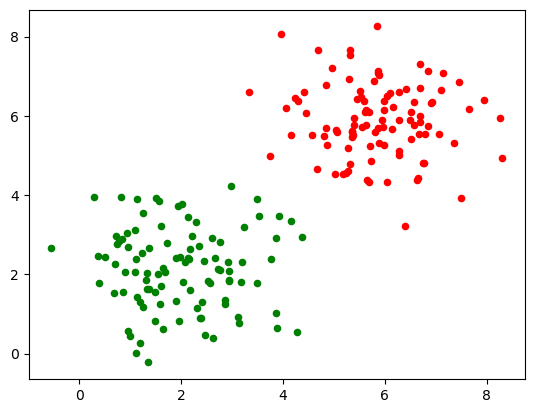

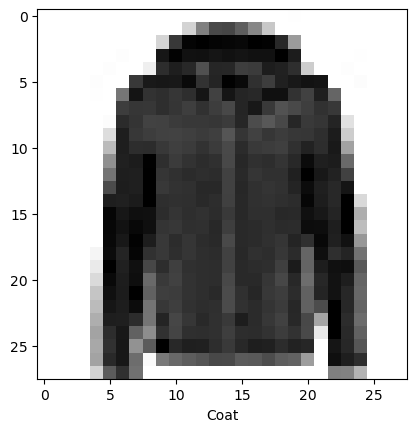

In [26]:
image_number = 5000
plt.figure()
plt.imshow(train_images[image_number], cmap=plt.cm.binary) 
plt.xlabel(class_names[train_labels[image_number]]) 
plt.grid(False)
plt.show()

In [27]:
train_images = keras.utils.normalize(train_images, axis=1) 
test_images = keras.utils.normalize(test_images, axis=1)

In [28]:
train_images[1][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00163724, 0.        , 0.        , 0.        , 0.        ,
       0.04180052, 0.18134076, 0.10028745, 0.05368613, 0.04603788,
       0.04237663, 0.08378428, 0.16247149, 0.13003419, 0.01660002,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [29]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
]);

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 791us/step - loss: 0.2750 - accuracy: 0.8970
Epoch 2/10
1875/1875 [==============================] - 2s 861us/step - loss: 0.2617 - accuracy: 0.9021
Epoch 3/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.2505 - accuracy: 0.9071
Epoch 4/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.2387 - accuracy: 0.9096
Epoch 5/10
1875/1875 [==============================] - 1s 772us/step - loss: 0.2295 - accuracy: 0.9138
Epoch 6/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.2223 - accuracy: 0.9168
Epoch 7/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.2136 - accuracy: 0.9195
Epoch 8/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.2046 - accuracy: 0.9229
Epoch 9/10
1875/1875 [==============================] - 1s 767us/step - loss: 0.1986 - accuracy: 0.9246
Epoch 10/10
1875/1875 [==============================] - 1s 785u

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 504us/step - loss: 0.3635 - accuracy: 0.8774

Test accuracy: 0.8773999810218811


In [35]:
test_item = 92
label = test_labels[test_item]
print('Label = ', label, ' : ', class_names[label])

Label =  6  :  Shirt


In [36]:
test_image = test_images[test_item] 
plt.imshow(test_image, cmap=plt.cm.binary) 
plt.xlabel(class_names[test_labels[test_item]])

Text(0.5, 0, 'Shirt')

In [37]:
predictions = model.predict(test_images)

In [38]:
predictions[test_item]

array([1.2526651e-06, 2.8779576e-09, 5.5143666e-03, 2.4339597e-05,
       2.2569871e-02, 3.9260282e-08, 9.7189009e-01, 4.6411944e-11,
       5.4240761e-08, 1.8294300e-11], dtype=float32)

In [39]:
df = pd.DataFrame(predictions[test_item]) 
ax = df.plot.bar()

In [40]:
predicted_label = np.argmax(predictions[test_item])
print('Predicted label = ', predicted_label, ' : ', class_names[predicted_label])

Predicted label =  6  :  Shirt
